# Scene classification

**Import the relevant libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(len(os.listdir("../input/train/images/")))


8932


In [2]:
import gc
gc.enable()
path = "../input/train/images/"

In [28]:
from fastai import *
from fastai.vision import *

In [4]:
bs = 8

In [5]:
df = pd.read_csv('../input/train/train.csv')
test = pd.read_csv('../input/test_ApKoW4T.csv')
sam = pd.read_csv('../input/sample_submission_ns2btKE.csv')

df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
df.shape

(6252, 2)

In [7]:
tfms1 = zoom_crop(scale=(0.75,2), do_rand=True)
tfms2 = [rand_resize_crop(150)]


In [8]:
'''(flip_vert=True, max_zoom=1.1,
                      max_warp=0.6,do_flip=True,
                      max_rotate=30.0,max_lighting=0.4,
                      p_affine=0.9, p_lighting=0.9,
                      #xtra_tfms=tfms1,
                      
                     )'''

'(flip_vert=True, max_zoom=1.1,\n                      max_warp=0.6,do_flip=True,\n                      max_rotate=30.0,max_lighting=0.4,\n                      p_affine=0.9, p_lighting=0.9,\n                      #xtra_tfms=tfms1,\n                      \n                     )'

In [9]:
tfms = get_transforms(flip_vert=True, max_zoom=1.2,
                      max_warp=0.2,do_flip=False,
                      max_rotate=20,max_lighting=0.5,
                      p_affine=0.75, p_lighting=0.75
                      #xtra_tfms=tfms1 '''ps = 0.1, mimxup''',
                     )

In [10]:
#do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None

In [11]:

data = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()
        #.add_test_folder(test_folder = '../test')
        .transform(tfms, size=(141, 240))
        .databunch(num_workers=0))



In [13]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={'row_pct': 0.9110484963834662, 'col_pct': 0.5786931582868998, 'padding_mode': 'reflection'}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={'magnitude': tensor([ 0.0705,  0.0587, -0.1392,  0.1151]), 'invert': False}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10, 10)}, p=0.75, resolved={'degrees': -8.172844039232245}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.2), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={'scale': 1.1609429715920392, 'row_pct': 0.5987521034577181, 'col_pct': 0.6246290081903993}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.25, 0.75)}, p=0.75, resolved={'change': 0.5005520823432452}, do_run=Fals

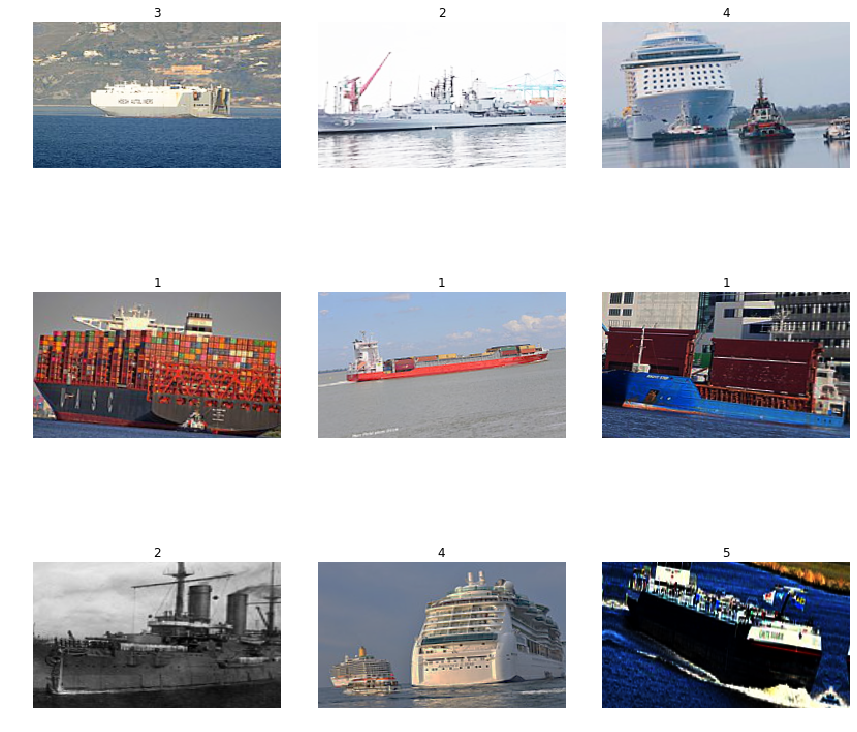

In [14]:
data.show_batch(rows=3,)

In [15]:
print(data.classes)

[1, 2, 3, 4, 5]


In [18]:
#arch
from torchvision.models import *


In [25]:
#from torchvision import transforms, datasets, models

In [35]:
learn = cnn_learner(data, models. , metrics=[error_rate, accuracy], model_dir="/tmp/model/", wd=1e-2,ps=0.3).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


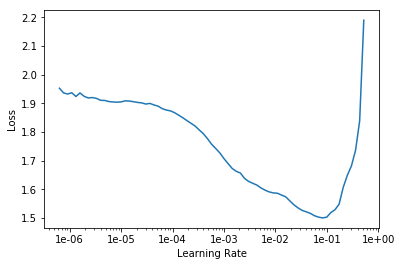

In [38]:
gc.collect()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [43]:
lr = 1e-3
gc.collect()
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.146477,0.577630,0.196000,0.804000,01:05
1,0.967871,0.426720,0.153600,0.846400,01:05
2,0.856449,0.330896,0.117600,0.882400,01:05
3,0.756992,0.309720,0.104800,0.895200,01:05
4,0.676242,0.247824,0.079200,0.920800,01:05
5,0.652625,0.259188,0.092800,0.907200,01:06
6,0.632477,0.220125,0.071200,0.928800,01:05
7,0.614084,0.216407,0.070400,0.929600,01:05
8,0.590783,0.215750,0.064800,0.935200,01:06
9,0.581648,0.213605,0.064000,0.936000,01:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


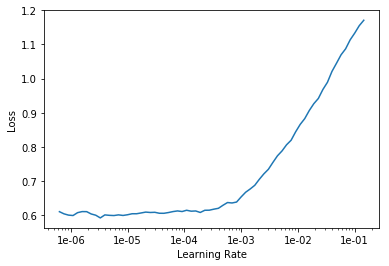

In [44]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [46]:
learn.fit_one_cycle(10,slice(1e-8,1e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.594500,0.212448,0.070400,0.929600,01:14
1,0.583801,0.213140,0.067200,0.932800,01:15
2,0.582083,0.212145,0.063200,0.936800,01:15
3,0.583725,0.208829,0.063200,0.936800,01:15
4,0.585922,0.211706,0.065600,0.934400,01:14
5,0.590488,0.210155,0.064000,0.936000,01:14
6,0.581520,0.209853,0.065600,0.934400,01:15
7,0.573831,0.210702,0.062400,0.937600,01:14
8,0.583426,0.211994,0.067200,0.932800,01:15
9,0.582034,0.211016,0.063200,0.936800,01:15


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06


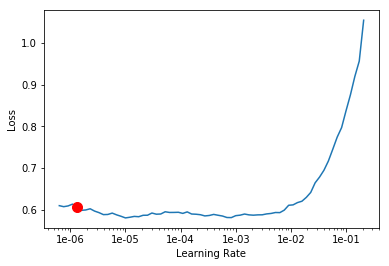

In [51]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(3,(2e-2))
learn.fit_one_cycle(10,(1e-3))


learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
learn.fit_one_cycle(10,(1e-8,1e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.889633,0.736568,0.268800,0.731200,01:06
1,0.804522,0.451407,0.152800,0.847200,01:07
2,0.714329,0.302747,0.095200,0.904800,01:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.652683,0.294646,0.087200,0.912800,01:06


In [48]:
learn.save('20+10')
gc.collect()

959

In [49]:
sam.head()

,image,category
0,1007700.jpg,1
1,1011369.jpg,1
2,1051155.jpg,1
3,1062001.jpg,1
4,1069397.jpg,1


In [50]:
path = "../input/train/images/"
a=0
for i in test.image:
    ig = path+i
    x = open_image(ig)
    y = (learn.predict(x))
    y = str(y[0])
    sam.iloc[a, 1] = y
    a+=1

sam.to_csv('goda.csv', index = False)
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
create_download_link(sam)

In [ ]:
sam.head()

**Changing image resolution to 256**